In [1]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

<h1>Logistic Regression</h1>

<b>Logistic Regression</b> is a type of <b>Generalized Linear Model (GLM)</b> that uses a logistic function to model a binary variable based on any kind of independent variables.

<h2>Read Data</h2>

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2>Normalization</h2>

In [3]:
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for column in columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


<h2>One-Hot Encoding</h2>

In [4]:
cleanup = {
    "sex": {
        0: "female",
        1: "male"
    },
    "cp": {
        0: "asymptomatic",
        1: "atypical angina",
        2: "non-anginal pain",
        3: "typical angina"
    },
    "restecg": {
        0: "left ventricular hypertrophy",
        1: "normal",
        2: "ST-T wave abnormality"
    }, 
    "slope": {
        0: "negative",
        1: "zero",
        2: "positive"
    },
    "thal": {
        0: "nothing",
        1: "fixed defect",
        2: "normal",
        3: "reversable defect"
    }
}

In [5]:
df = df.replace(cleanup)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,male,typical angina,0.481132,0.244292,1,left ventricular hypertrophy,0.603053,0,0.370968,negative,0,fixed defect,1
1,0.166667,male,non-anginal pain,0.339623,0.283105,0,normal,0.885496,0,0.564516,negative,0,normal,1
2,0.250000,female,atypical angina,0.339623,0.178082,0,left ventricular hypertrophy,0.770992,0,0.225806,positive,0,normal,1
3,0.562500,male,atypical angina,0.245283,0.251142,0,normal,0.816794,0,0.129032,positive,0,normal,1
4,0.583333,female,asymptomatic,0.245283,0.520548,0,normal,0.702290,1,0.096774,positive,0,normal,1


In [6]:
final = pd.get_dummies(df, drop_first=False)
#final = final.drop(['restecg_ST-T wave abnormality', 'slope_zero', 'thal_nothing'], axis=1)
final.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_ST-T wave abnormality,restecg_left ventricular hypertrophy,restecg_normal,slope_negative,slope_positive,slope_zero,thal_fixed defect,thal_normal,thal_nothing,thal_reversable defect
0,0.708333,0.481132,0.244292,1,0.603053,0,0.370968,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0
1,0.166667,0.339623,0.283105,0,0.885496,0,0.564516,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2,0.250000,0.339623,0.178082,0,0.770992,0,0.225806,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,0.562500,0.245283,0.251142,0,0.816794,0,0.129032,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0
4,0.583333,0.245283,0.520548,0,0.702290,1,0.096774,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0


<h3>Split data into random train and test subsets</h3>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = final.drop('target', axis=1)
y = final['target']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6)

In [10]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [11]:
y_pred = logreg.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.8524590163934426


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



[[25  6]
 [ 3 27]]


<AxesSubplot:>

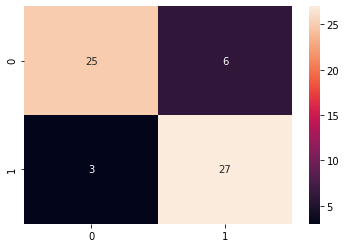

In [13]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)